In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lenses as ln

%matplotlib widget

#Keep this as long as lenses.py is being edited TODO delete once done
from importlib import reload  # Python 3.4+
ln = reload(ln)

48mm deep from last lens to film image
about 4.6cm diameter for lenses, keep in mind, so about 1.3-1.35 magnification for filters. (about half for achrom, which I think will be down the road)

In [ ]:
#Condition data, remove bad ones, save to compilation


#Loading in 4 part lens data

data = np.zeros((1,11))
data = np.array(data)

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]:
     name = "4PartLensData/4PartLens1-" + str(i) + ".npy"
     newData = np.array(np.load(name))
     data = np.concatenate((data,newData), axis=0)
     

print("The list came in " + str(len(data)) + " long")

np.array(data)
#Make sure image is deep enough from last lens
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]-data[x,8]-data[x,9]-data[x,10]>48]
data = np.array(data)
#Make sure lens is less than a meter long
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<1000]
data = np.array(data)
#Make sure filter to film ratio is less than 100 (aka, not infinity)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<100]
data = np.array(data)


print("The list is now " + str(len(data)) + " Lens systems long")

name = "4PartLensData/4PartLens1-ALL.npy"
np.save(name, data, allow_pickle=True, fix_imports=True)

ln.plotLensesColor(data[:,3], data[:,1]/data[:,3], data[:,2], 'Film Image Height vs Filter Magnification vs Length of Lens', "Film Image Height","Filter Magnification","Length of Lens")


The list is 20296191 long
The list is now 519 Lens systems long


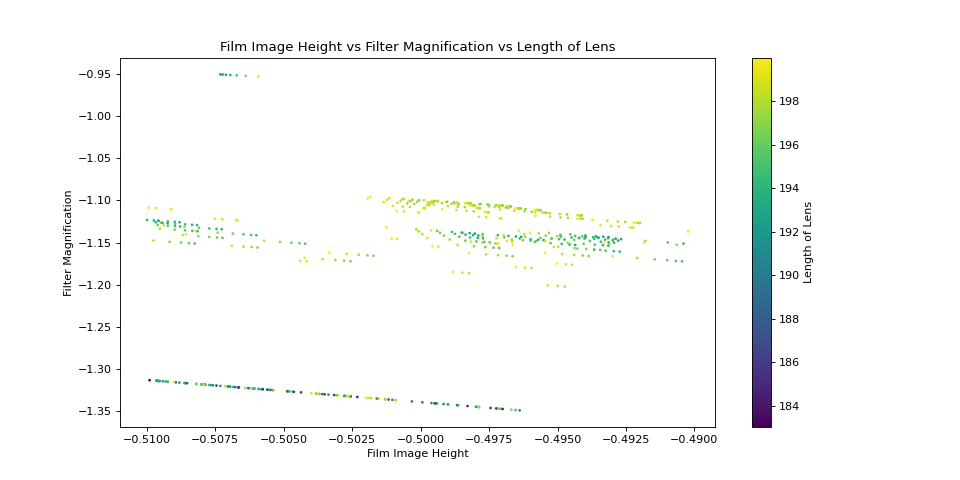

In [6]:
#Now we can edit and apply fuzzy filters
name = "4PartLensData/4PartLens1-ALL.npy"
data = np.array(np.load(name))

print("The list is " + str(len(data)) + " long")

#This tightens up our main params

data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,3])<0.65 and abs(data[x,3])>0.45]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<200]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])>0.95]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,3])>0.49 and abs(data[x,3])<0.51]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if abs(data[x,1]/data[x,3])<1.35]
data = np.array(data)
print("The list is now " + str(len(data)) + " Lens systems long")



ln.plotLensesColor(data[:,3], data[:,1]/data[:,3], data[:,2], 'Film Image Height vs Filter Magnification vs Length of Lens', "Film Image Height","Filter Magnification","Length of Lens")


The list is 519 long
The list is now 5 Lens systems long


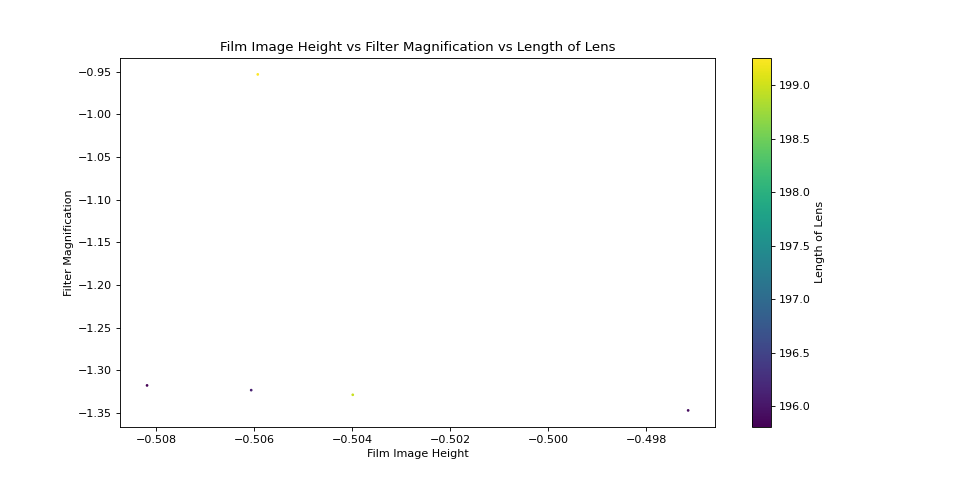

In [7]:
print("The list is " + str(len(data)) + " long")

#This cuts down lens design aspects, mainly gap length

data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,8]>6]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,9]>6]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,10]>6]
data = np.array(data)
data = [data[x,:] for x in list(range(0, len(data))) if data[x,2]<250]
data = np.array(data)

print("The list is now " + str(len(data)) + " Lens systems long")

ln.plotLensesColor(data[:,3], data[:,1]/data[:,3], data[:,2], 'Film Image Height vs Filter Magnification vs Length of Lens', "Film Image Height","Filter Magnification","Length of Lens")


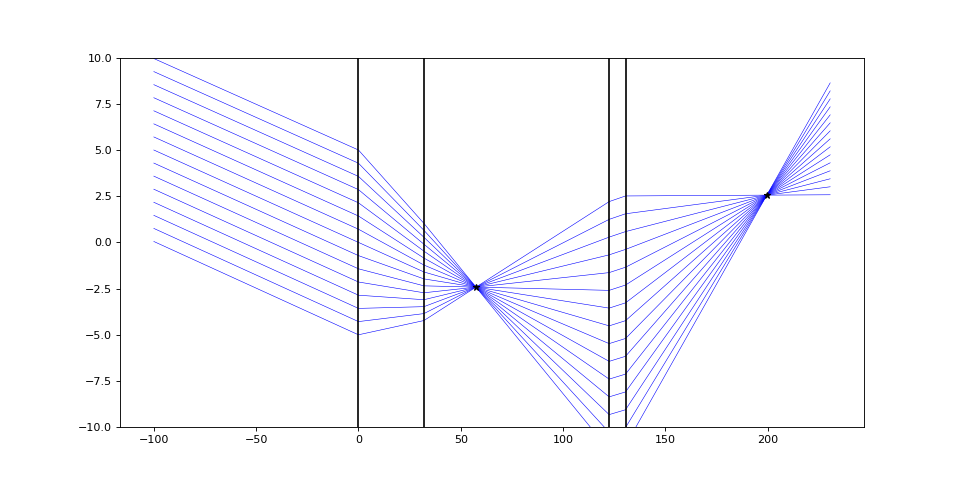

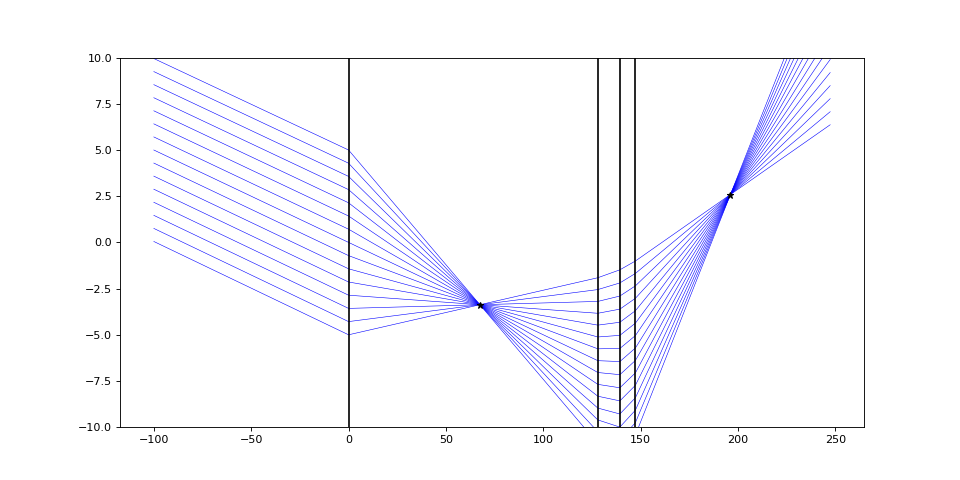

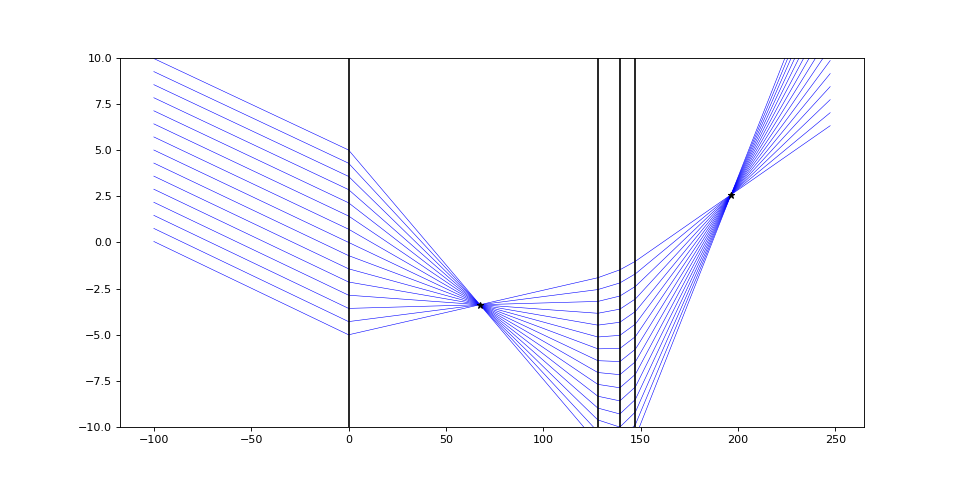

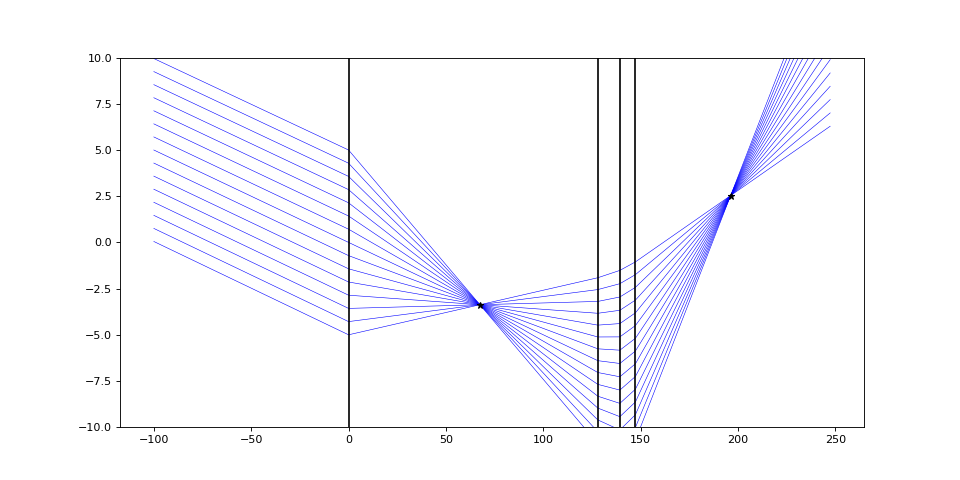

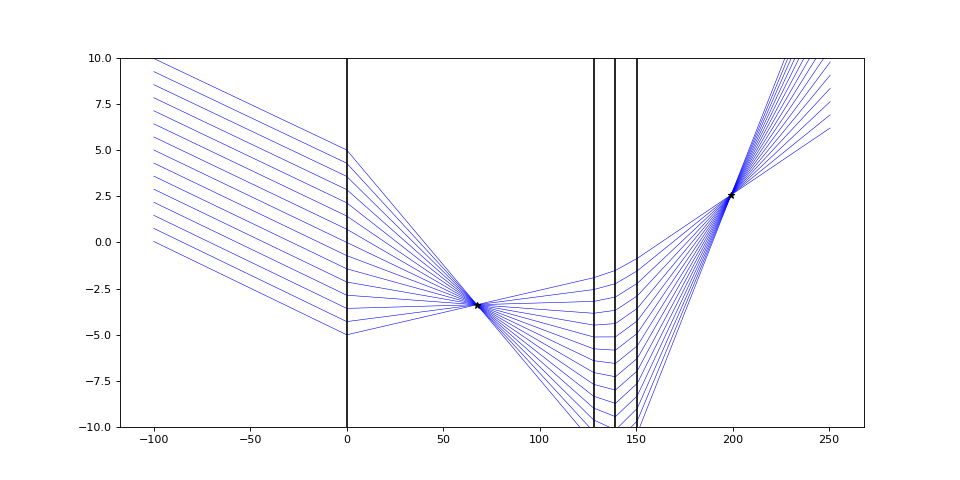

In [8]:
#Plot remaining lenses
for i in np.arange(0,len(data),1):
    lens = ln.opticalSystem([data[i,4],data[i,5],data[i,6],data[i,7]],[-100,100,data[i,8],data[i,9],data[i,10],100])
    ln.rayTracePlot(lens,ln.imageRays(-10000,500,5,15))


In [12]:
print(data[:,[4,5,6,7]])
print(data[:,[8,9,10]])
print(data[:,1]/data[:,3])

[[ 67.  90.  67.  67.]
 [ 67. 140.  67.  73.]
 [ 67. 140.  73.  67.]
 [ 67. 175.  67.  67.]
 [ 67. 175.  67.  67.]]
[[ 32.          90.50966799   8.        ]
 [128.          11.3137085    8.        ]
 [128.          11.3137085    8.        ]
 [128.          11.3137085    8.        ]
 [128.          11.3137085   11.3137085 ]]
[-0.95320771 -1.31753913 -1.32307385 -1.34681051 -1.32851573]
